<a href="https://colab.research.google.com/github/aguessous/hello-world/blob/master/Another_copy_of_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 : Téléchargez le contenu de la base de données.

In [ ]:
# 1) Importer TensorFlow/Keras et numpy
import numpy as np
from tensorflow import keras

# 2) Récupérer l'objet "fashion_mnist" depuis keras.datasets
fashion_mnist = keras.datasets.fashion_mnist

# 3) Télécharger/charger les données (train + test)
#    load_data() renvoie deux tuples:
#    - (X_train, y_train) pour l'entraînement
#    - (X_test,  y_test)  pour le test
#    Si c'est la première fois, Keras tente de télécharger sur internet,
#    puis met en cache dans ~/.keras/datasets/
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 4) Vérifier les formes (dimensions) des tenseurs d'images et de labels
print("Images d'entraînement :", X_train.shape)  # attendu: (60000, 28, 28)
print("Labels d'entraînement :", y_train.shape)  # attendu: (60000,)
print("Images de test        :", X_test.shape)   # attendu: (10000, 28, 28)
print("Labels de test        :", y_test.shape)   # attendu: (10000,)

# 5) (Optionnel) Dictionnaire des noms de classes pour plus de lisibilité
class_names = {
    0: "T-shirt/top", 1: "Trouser (Pantalon)", 2: "Pullover",
    3: "Dress (Robe)", 4: "Coat (Manteau)",    5: "Sandal (Sandale)",
    6: "Shirt (Chemise)", 7: "Sneaker (Basket)", 8: "Bag (Sac)",
    9: "Ankle boot (Bottine)"
}

# 6) Exemple : afficher les 5 premiers labels avec leur nom lisible
for i in range(5):
    print(f"y_train[{i}] = {y_train[i]} -> {class_names[int(y_train[i])]}")


Images d'entraînement : (60000, 28, 28)
Labels d'entraînement : (60000,)
Images de test        : (10000, 28, 28)
Labels de test        : (10000,)
y_train[0] = 9 -> Ankle boot (Bottine)
y_train[1] = 0 -> T-shirt/top
y_train[2] = 0 -> T-shirt/top
y_train[3] = 3 -> Dress (Robe)
y_train[4] = 0 -> T-shirt/top


# 2 . Affichez trois échantillons de cette base de données

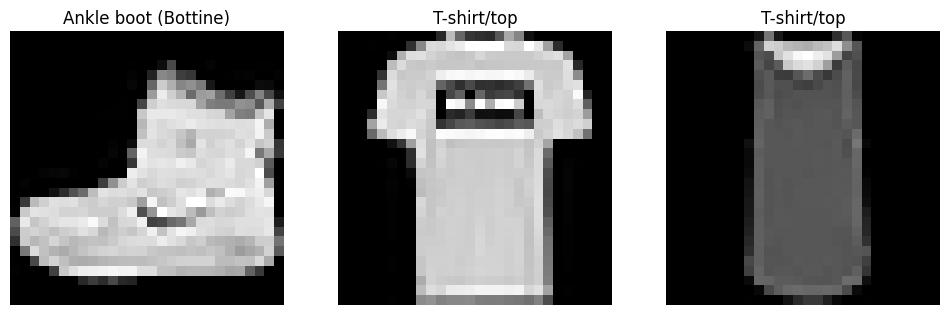

In [ ]:
import matplotlib.pyplot as plt

# On affiche 3 images de la base d'entraînement
plt.figure(figsize=(12, 4))  # taille de l'affichage

for i in range(3):
    plt.subplot(1, 3, i + 1)  # 1 ligne, 3 colonnes, position i+1
    plt.imshow(X_train[i], cmap="gray")  # afficher l'image en niveaux de gris
    plt.title(class_names[y_train[i]])   # titre = nom de la classe
    plt.axis("off")  # enlever les axes pour plus de clarté

plt.show()


# 3. Procédez à une normalisation des données ente 0 et 1

In [ ]:
# Normalisation : on convertit les pixels de [0,255] vers [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Vérification
print("Min pixel:", X_train.min(), "Max pixel:", X_train.max())


Min pixel: 0.0 Max pixel: 1.0


# 4. Vérifiez la taille de l’échantillon d’entrainement et de test par classe

In [ ]:
import pandas as pd

df_train = pd.DataFrame({"label": y_train})
df_test  = pd.DataFrame({"label": y_test})

train_counts = df_train["label"].value_counts().sort_index()
test_counts  = df_test["label"].value_counts().sort_index()

summary = pd.DataFrame({
    "Nom": [class_names[i] for i in range(10)],
    "Train": [train_counts.get(i, 0) for i in range(10)],
    "Test":  [test_counts.get(i, 0) for i in range(10)],
}, index=range(10))

print(summary)
print("\nVérif total train =", summary["Train"].sum(), "==", len(y_train))
print("Vérif total test  =", summary["Test"].sum(), "==", len(y_test))


                    Nom  Train  Test
0           T-shirt/top   6000  1000
1    Trouser (Pantalon)   6000  1000
2              Pullover   6000  1000
3          Dress (Robe)   6000  1000
4        Coat (Manteau)   6000  1000
5      Sandal (Sandale)   6000  1000
6       Shirt (Chemise)   6000  1000
7      Sneaker (Basket)   6000  1000
8             Bag (Sac)   6000  1000
9  Ankle boot (Bottine)   6000  1000

Vérif total train = 60000 == 60000
Vérif total test  = 10000 == 10000


# 6000 images pour l'entrainement et 1000 pour les tests

# 5. Développez un RNP à deux couches cachées (de dimensions [300,100]).

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, initializers

tf.random.set_seed(42)  # pour la reproductibilité des poids initiaux

model = models.Sequential()

# 1) Aplatir l'image 28x28 -> vecteur 784
model.add(layers.Flatten(input_shape=(28, 28)))

# 2) Couche cachée 1: 300 neurones, init He
model.add(layers.Dense(
    300,
    kernel_initializer=initializers.HeNormal(),  # He pour familles ReLU
    bias_initializer='zeros'
))

# Activation séparée: LeakyReLU (évite les "neurones morts" de ReLU)
model.add(layers.LeakyReLU(negative_slope=0.01))

# 3) Couche cachée 2: 100 neurones, init He
model.add(layers.Dense(
    100,
    kernel_initializer=initializers.HeNormal(),
    bias_initializer='zeros'
))

model.add(layers.LeakyReLU(negative_slope=0.01))

# 4) Sortie: 10 classes -> Softmax
model.add(layers.Dense(
    10,
    activation='softmax',
    kernel_initializer=initializers.HeNormal(),  # possible aussi ici
    bias_initializer='zeros'
))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# 6. Affichez le résumé du modèle

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Entrainez le modèle et déterminez le taux de classification global, les taux de classification par classe et la matrice de confusion

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

# --- 1) Sécurité/reproductibilité
tf.random.set_seed(42)
np.random.seed(42)

# --- 2) Compilation du modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- 3) Callbacks utiles
early_stop = callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True
)

# --- 4) Entraînement ---
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,   # 10% du train pour valider
    callbacks=[early_stop],
    verbose=2
)

# --- 5) Taux global sur le jeu de test ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n[GLOBAL] Accuracy test = {test_acc:.4f}")

# --- 6) Prédictions (classes) sur le test ---
y_proba = model.predict(X_test, verbose=0)   # shape: (10000, 10)
y_pred  = np.argmax(y_proba, axis=1)         # classes prédites 0..9

# --- 7) Taux par classe ---
per_class_acc = {}
for c in range(10):
    idx = (y_test == c)
    if idx.sum() == 0:
        per_class_acc[c] = np.nan
    else:
        per_class_acc[c] = (y_pred[idx] == y_test[idx]).mean()

print("\n[PAR CLASSE] Accuracy par classe :")
for c in range(10):
    nom = class_names[c]
    acc = per_class_acc[c]
    print(f"  {c:>2} - {nom:<20} : {acc:.4f}")

# --- 8) Matrice de confusion ---
cm = confusion_matrix(y_test, y_pred, labels=list(range(10)))
print("\nMatrice de confusion (lignes = vraies classes, colonnes = prédictions) :\n")
print(cm)

# --- 9) Rapport détaillé (precision/recall/F1) ---
print("\nRapport de classification :\n")
print(classification_report(y_test, y_pred, target_names=[class_names[i] for i in range(10)], digits=4))


Epoch 1/15
422/422 - 6s - 14ms/step - accuracy: 0.8139 - loss: 0.5307 - val_accuracy: 0.8528 - val_loss: 0.4087
Epoch 2/15
422/422 - 4s - 8ms/step - accuracy: 0.8642 - loss: 0.3792 - val_accuracy: 0.8635 - val_loss: 0.3738
Epoch 3/15
422/422 - 3s - 8ms/step - accuracy: 0.8775 - loss: 0.3351 - val_accuracy: 0.8678 - val_loss: 0.3485
Epoch 4/15
422/422 - 6s - 15ms/step - accuracy: 0.8876 - loss: 0.3061 - val_accuracy: 0.8673 - val_loss: 0.3584
Epoch 5/15
422/422 - 4s - 9ms/step - accuracy: 0.8946 - loss: 0.2848 - val_accuracy: 0.8753 - val_loss: 0.3507
Epoch 6/15
422/422 - 5s - 12ms/step - accuracy: 0.9002 - loss: 0.2685 - val_accuracy: 0.8752 - val_loss: 0.3404
Epoch 7/15
422/422 - 5s - 11ms/step - accuracy: 0.9055 - loss: 0.2542 - val_accuracy: 0.8780 - val_loss: 0.3461
Epoch 8/15
422/422 - 3s - 8ms/step - accuracy: 0.9096 - loss: 0.2420 - val_accuracy: 0.8800 - val_loss: 0.3522
Epoch 9/15
422/422 - 3s - 8ms/step - accuracy: 0.9147 - loss: 0.2303 - val_accuracy: 0.8830 - val_loss: 0.34

- Le modèle apprend bien : **accuracy train** 0.93 → **val_accuracy** ≈ 0.89 (écart modéré, peu d’overfitting).
- **Test = 0.8887**, très proche de la **val** → bonne généralisation.
- **Faciles** : Pantalon, Sandale, Sac, Bottine, Basket (≈ **>95%**).
- **Difficiles** : **Chemise (66%)**, Manteau (80%), Pullover (81%).
- **Confusions clés** : **Chemise ↔ T-shirt/top**, **Manteau ↔ Pullover**.


# 8. Utilisez une normalisation par batch et déterminez le taux de classification global, la matrice de confusion et évaluez les performances

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, initializers

tf.random.set_seed(42)  # reproductibilité (optionnel)

model_bn = models.Sequential([
    # Aplatir 28x28 -> 784
    layers.Flatten(input_shape=(28, 28)),

    # Couche cachée 1
    layers.Dense(
        300,
        use_bias=False,                                  # <- pas de biais (BN s'en charge)
        kernel_initializer=initializers.HeNormal()       # init He pour (Leaky)ReLU
    ),
    layers.BatchNormalization(),                         # <- normalise (m, v) du mini-batch
    layers.LeakyReLU(alpha=0.01),                        # <- petite pente côté négatif

    # Couche cachée 2
    layers.Dense(
        100,
        use_bias=False,
        kernel_initializer=initializers.HeNormal()
    ),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),

    # Sortie 10 classes
    layers.Dense(10, activation='softmax')               # biais OK ici
])

model_bn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

In [ ]:
# 1) Compiler le modèle BatchNorm
model_bn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 2) Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=3, restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5
)

# 3) Entraînement
history_bn = model_bn.fit(
    X_train, y_train,
    epochs=25,
    batch_size=128,          # BatchNorm aime les batchs pas trop petits
    validation_split=0.1,    # 10% du train pour la validation
    callbacks=[early_stop, reduce_lr],
    verbose=2
)


Epoch 1/25
422/422 - 5s - 13ms/step - accuracy: 0.8410 - loss: 0.4550 - val_accuracy: 0.8695 - val_loss: 0.3647 - learning_rate: 1.0000e-03
Epoch 2/25
422/422 - 5s - 12ms/step - accuracy: 0.8819 - loss: 0.3237 - val_accuracy: 0.8652 - val_loss: 0.3715 - learning_rate: 1.0000e-03
Epoch 3/25
422/422 - 5s - 11ms/step - accuracy: 0.8967 - loss: 0.2793 - val_accuracy: 0.8767 - val_loss: 0.3380 - learning_rate: 1.0000e-03
Epoch 4/25
422/422 - 5s - 11ms/step - accuracy: 0.9098 - loss: 0.2459 - val_accuracy: 0.8780 - val_loss: 0.3376 - learning_rate: 1.0000e-03
Epoch 5/25
422/422 - 4s - 9ms/step - accuracy: 0.9213 - loss: 0.2190 - val_accuracy: 0.8703 - val_loss: 0.3694 - learning_rate: 1.0000e-03
Epoch 6/25
422/422 - 5s - 13ms/step - accuracy: 0.9301 - loss: 0.1955 - val_accuracy: 0.8693 - val_loss: 0.3818 - learning_rate: 1.0000e-03
Epoch 7/25
422/422 - 4s - 9ms/step - accuracy: 0.9441 - loss: 0.1598 - val_accuracy: 0.8828 - val_loss: 0.3461 - learning_rate: 5.0000e-04
Epoch 8/25
422/422 - 4

In [ ]:
import numpy as np
best_epoch = int(np.argmax(history_bn.history['val_accuracy']))
best_val  = float(history_bn.history['val_accuracy'][best_epoch])
print(f"Meilleure val_accuracy={best_val:.4f} à l'époque {best_epoch}")


Meilleure val_accuracy=0.8967 à l'époque 16


In [ ]:
# 8-C) Évaluer le modèle BatchNorm sur le jeu de test
test_loss_bn, test_acc_bn = model_bn.evaluate(X_test, y_test, verbose=0)
print(f"[BatchNorm] Test accuracy = {test_acc_bn:.4f} | Test loss = {test_loss_bn:.4f}")


[BatchNorm] Test accuracy = 0.8968 | Test loss = 0.3518


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 1) Prédictions (classes 0..9)
y_proba_bn = model_bn.predict(X_test, verbose=0)   # (10000, 10) proba par classe
y_pred_bn  = np.argmax(y_proba_bn, axis=1)         # (10000,) classe la + probable

# 2) Matrice de confusion : lignes = vraies classes, colonnes = classes prédites
cm_bn = confusion_matrix(y_test, y_pred_bn, labels=list(range(10)))
print("\nMatrice de confusion (true = lignes, pred = colonnes):\n")
print(cm_bn)

# 3) Accuracy par classe (diagonale / total de ligne)
per_class_acc_bn = cm_bn.diagonal() / cm_bn.sum(axis=1)
print("\nAccuracy par classe :")
for c in range(10):
    print(f"{c:>2} - {class_names[c]:<20} : {per_class_acc_bn[c]:.4f}")

# 4) Rapport de classification (precision, recall, F1, support)
print("\nRapport de classification :\n")
print(classification_report(
    y_test, y_pred_bn,
    target_names=[class_names[i] for i in range(10)],
    digits=4
))




Matrice de confusion (true = lignes, pred = colonnes):

[[819   2  14  21   6   1 130   1   6   0]
 [  3 979   1  14   0   0   3   0   0   0]
 [ 18   1 819  10  79   2  68   0   3   0]
 [ 21   5  11 899  30   0  30   0   4   0]
 [  1   1  83  25 840   1  48   0   1   0]
 [  1   0   0   0   0 965   0  22   1  11]
 [ 91   1  61  21  65   0 754   0   7   0]
 [  0   0   0   0   0  13   0 968   0  19]
 [  5   0   5   5   2   2   6   5 970   0]
 [  0   0   0   0   0   9   1  35   0 955]]

Accuracy par classe :
 0 - T-shirt/top          : 0.8190
 1 - Trouser (Pantalon)   : 0.9790
 2 - Pullover             : 0.8190
 3 - Dress (Robe)         : 0.8990
 4 - Coat (Manteau)       : 0.8400
 5 - Sandal (Sandale)     : 0.9650
 6 - Shirt (Chemise)      : 0.7540
 7 - Sneaker (Basket)     : 0.9680
 8 - Bag (Sac)            : 0.9700
 9 - Ankle boot (Bottine) : 0.9550

Rapport de classification :

                      precision    recall  f1-score   support

         T-shirt/top     0.8540    0.8190    0

# 9. Comparez les résultats avec et sans normalisation par batch

# ✅ Résumé global (Sans BN vs Avec BN)

- **Accuracy test (global)** : **0.8887** ➜ **0.8840** (**–0.0047**)
- **Macro recall** : 0.8887 ➜ 0.8840 (–0.0047)
- la **BatchNorm n'améliore pas** l’accuracy globale





# 10. Commentez les deux matrices de confusion.

# 📊 Par classe — évolution (points d’accuracy, rappel par classe)
(Δ = Avec BN – Sans BN)

- **T-shirt/top** : 82.6% ➜ 82.6% **–5.0 pts**
- **Trouser (Pantalon)** : 96.6% ➜ 97.6% **+1.0 pt**
- **Pullover** : 81.5% ➜ 84.3% **+2.8 pts**
- **Dress (Robe)** : 91.4% ➜ 91.2% **–0.2 pt**
- **Coat (Manteau)** : 80.4% ➜ 76.2% **–4.2 pts**
- **Sandal (Sandale)** : 96.4% ➜ 95.4% **–1.0 pt**
- **Shirt (Chemise)** : 66.2% ➜ 66.9% **+0.7 pt**
- **Sneaker (Basket)** : 95.7% ➜ 96.5% **+0.8 pt**
- **Bag (Sac)** : 97.2% ➜ 98.2% **+1.0 pt**
- **Ankle boot (Bottine)** : 95.7% ➜ 95.1% **–0.6 pt**

- **Gains notables** : *Pullover* (+2.8), petites hausses sur *Trouser*, *Shirt*, *Sneaker*, *Bag*.
- **Pertes notables** : *T-shirt/top* (–5.0), *Coat* (–4.2), petites baisses sur *Sandal*, *Ankle boot*.

Elle **rééquilibre certaines frontières** (mieux pour *Shirt vs T-shirt*), mais **dégrade** d’autres (*Coat vs Pullover*).


 **la version sans BN** est légèrement **meilleure** car BN aide surtout les réseaux **plus profonds** et **CNN**.

# 11. On va procéder maintenant à un transfert d’apprentissage. Supposons que la base de données Fashion MNIST contienne huit classes : toutes les classes sauf la classe sandale et la classe chemise (’Sandal’ et ’Shirt’). Construisez les sous-bases de données X_train_A, X_valid_A et X_test_A.

In [ ]:
# A) Filtrer le dataset pour ne garder que 8 classes (sans Sandal/Shirt)
import numpy as np

# 1) Classes à exclure
exclude = {5, 6}  # 5=Sandal, 6=Shirt

# 2) Masques booléens: True si l'étiquette n'est PAS dans {5,6}
mask_train = ~np.isin(y_train, list(exclude))
mask_test  = ~np.isin(y_test,  list(exclude))

# 3) On filtre les jeux
X_train_8 = X_train[mask_train]
y_train_8 = y_train[mask_train]
X_test_8  = X_test[mask_test]
y_test_8  = y_test[mask_test]

# 4) Petits contrôles
print(X_train_8.shape, y_train_8.shape)
print(X_test_8.shape,  y_test_8.shape)


(48000, 28, 28) (48000,)
(8000, 28, 28) (8000,)


In [ ]:
# B) Créer la validation depuis le train (stratifiée)
from sklearn.model_selection import train_test_split

# 5) Split train/valid (10% valid), stratifié pour garder la proportion de chaque classe
X_train_A, X_valid_A, y_train_A, y_valid_A = train_test_split(
    X_train_8, y_train_8,
    test_size=0.10,        # 10% pour la validation
    stratify=y_train_8,    # on conserve les proportions par classe
    random_state=42        # reproductibilité
)

# 6) Le test devient notre X_test_A / y_test_A (déjà filtré à l'étape 11-A)
X_test_A, y_test_A = X_test_8, y_test_8

# 7) Contrôles de taille
print("Train A :", X_train_A.shape, y_train_A.shape)
print("Valid A :", X_valid_A.shape, y_valid_A.shape)
print("Test  A :", X_test_A.shape,  y_test_A.shape)


Train A : (43200, 28, 28) (43200,)
Valid A : (4800, 28, 28) (4800,)
Test  A : (8000, 28, 28) (8000,)


In [ ]:
# C) Re-mapper les labels sur 0..7 (nouvel alphabet de classes)

# 8) Définir la table de remapping: ancien -> nouveau
old_labels = [0, 1, 2, 3, 4, 7, 8, 9]
new_labels = list(range(8))  # 0..7
old_to_new = {old:new for old, new in zip(old_labels, new_labels)}

# 9) Fonction utilitaire de remap
def remap(y, mapping):
    return np.array([mapping[int(a)] for a in y], dtype=np.int64)

# 10) Appliquer le remap aux 3 jeux
y_train_A = remap(y_train_A, old_to_new)
y_valid_A = remap(y_valid_A, old_to_new)
y_test_A  = remap(y_test_A,  old_to_new)

# 11) (Optionnel) Noms de classes "A" (sur l'alphabet 0..7)
class_names_A = {
    0: "T-shirt/top",
    1: "Trouser (Pantalon)",
    2: "Pullover",
    3: "Dress (Robe)",
    4: "Coat (Manteau)",
    5: "Sneaker (Basket)",   # ancien 7
    6: "Bag (Sac)",          # ancien 8
    7: "Ankle boot (Bottine)"# ancien 9
}

# 12) Contrôle: vérifier qu'on n'a plus que les labels 0..7
print("Labels train_A :", np.unique(y_train_A))
print("Labels valid_A :", np.unique(y_valid_A))
print("Labels test_A  :", np.unique(y_test_A))


Labels train_A : [0 1 2 3 4 5 6 7]
Labels valid_A : [0 1 2 3 4 5 6 7]
Labels test_A  : [0 1 2 3 4 5 6 7]


# 12. Développez un modèle A basée sur l’entrainement à partir de ces huit classes en utilisant cinq couches cachées (de dimensions [300,100,50,50,50]), une fonction d’activation selu, une déscente de gradient et un taux  d’apprentissage = 0,001).

In [ ]:
# A) Architecture du modèle A (8 classes, 5 couches cachées, SELU)

import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

# Modèle A : entrées 28x28 => 8 classes, 5 couches cachées [300,100,50,50,50], activation SELU
model_A = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),                            # (1) 28x28 -> vecteur 784
    layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(8,   activation="softmax")                          # (2) sortie : 8 classes (0..7)
])

model_A.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276,158 (1.05 MB)

 Trainable params: 276,158 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# B) Compilation — descente de gradient (SGD) à lr = 0,001
model_A.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3),   # "descente de gradient" demandée
    loss="sparse_categorical_crossentropy",         # labels entiers 0..7
    metrics=["accuracy"]
)


In [ ]:
# C) Entraînement sur (X_train_A, y_train_A) + validation sur (X_valid_A, y_valid_A)
history_A = model_A.fit(
    X_train_A, y_train_A,
    epochs=25,
    batch_size=128,
    validation_data=(X_valid_A, y_valid_A),
    verbose=2
)


Epoch 1/25
338/338 - 4s - 11ms/step - accuracy: 0.7108 - loss: 1.0264 - val_accuracy: 0.8260 - val_loss: 0.6279
Epoch 2/25
338/338 - 4s - 13ms/step - accuracy: 0.8384 - loss: 0.5438 - val_accuracy: 0.8483 - val_loss: 0.4778
Epoch 3/25
338/338 - 2s - 7ms/step - accuracy: 0.8573 - loss: 0.4495 - val_accuracy: 0.8642 - val_loss: 0.4169
Epoch 4/25
338/338 - 3s - 8ms/step - accuracy: 0.8681 - loss: 0.4032 - val_accuracy: 0.8702 - val_loss: 0.3821
Epoch 5/25
338/338 - 3s - 9ms/step - accuracy: 0.8754 - loss: 0.3747 - val_accuracy: 0.8756 - val_loss: 0.3595
Epoch 6/25
338/338 - 5s - 14ms/step - accuracy: 0.8808 - loss: 0.3554 - val_accuracy: 0.8823 - val_loss: 0.3437
Epoch 7/25
338/338 - 2s - 7ms/step - accuracy: 0.8848 - loss: 0.3413 - val_accuracy: 0.8863 - val_loss: 0.3320
Epoch 8/25
338/338 - 2s - 7ms/step - accuracy: 0.8884 - loss: 0.3305 - val_accuracy: 0.8917 - val_loss: 0.3229
Epoch 9/25
338/338 - 3s - 8ms/step - accuracy: 0.8908 - loss: 0.3218 - val_accuracy: 0.8938 - val_loss: 0.315

# 13. Évaluez les performances du modèle A

In [ ]:
# A) Taux global (accuracy + loss) sur le test A
# Évalue le modèle A sur le jeu de test (8 classes)
test_loss_A, test_acc_A = model_A.evaluate(X_test_A, y_test_A, verbose=0)
print(f"[Model A] Test accuracy = {test_acc_A:.4f} | Test loss = {test_loss_A:.4f}")


[Model A] Test accuracy = 0.9004 | Test loss = 0.2890


In [ ]:
# B) Prédictions + matrice de confusion

import numpy as np
from sklearn.metrics import confusion_matrix

# 1) Probabilités -> classes prédites (0..7)
y_proba_A = model_A.predict(X_test_A, verbose=0)   # shape: (N_test, 8)
y_pred_A  = np.argmax(y_proba_A, axis=1)           # la classe la + probable

# 2) Matrice de confusion (lignes = vraies classes, colonnes = prédictions)
cm_A = confusion_matrix(y_test_A, y_pred_A, labels=list(range(8)))
print("\nMatrice de confusion (true = lignes, pred = colonnes):\n")
print(cm_A)



Matrice de confusion (true = lignes, pred = colonnes):

[[896   2  20  52   7   0  21   2]
 [  5 952   8  31   2   0   2   0]
 [ 30   3 808  14 132   0  12   1]
 [ 48  10  21 882  32   0   5   2]
 [  2   2 127  47 812   0   9   1]
 [  0   0   0   0   0 942   1  57]
 [  6   1  16   7   7   5 955   3]
 [  0   0   0   1   0  42   1 956]]


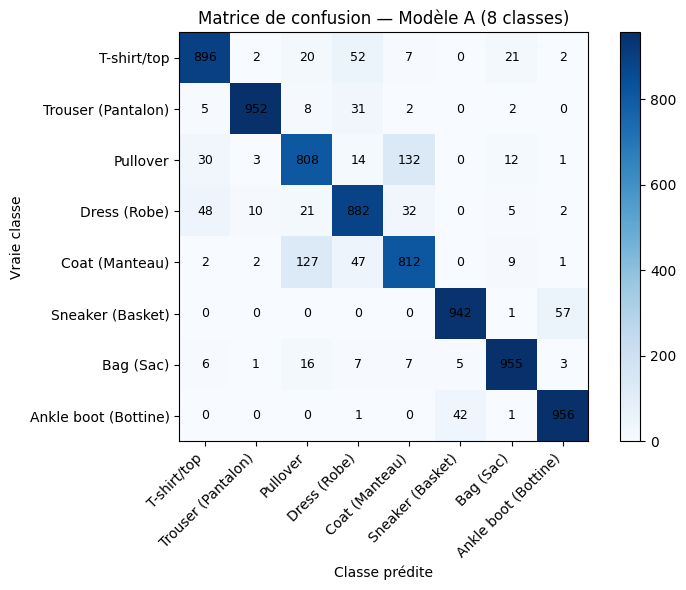

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_labels_A = [class_names_A[i] for i in range(8)]

cm = confusion_matrix(y_test_A, y_pred_A, labels=range(8))  # ou normalize="true"
fig, ax = plt.subplots(figsize=(8,6))

# >>> ICI la colormap (choisis 'Blues', 'viridis', 'magma', 'plasma', etc.)
im = ax.imshow(cm, cmap='Blues')   # maintenant c'est en couleur
fig.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=class_labels_A,
    yticklabels=class_labels_A,
    xlabel="Classe prédite",
    ylabel="Vraie classe",
    title="Matrice de confusion — Modèle A (8 classes)"
)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Annotations dans chaque case
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i,j]}", ha="center", va="center", fontsize=9)

fig.tight_layout()
plt.show()


In [ ]:
# C) Taux par classe + rapport de classification
from sklearn.metrics import classification_report

# 1) Accuracy par classe = diag / somme de ligne
per_class_acc_A = cm_A.diagonal() / cm_A.sum(axis=1)
print("\nAccuracy par classe :")
for i in range(8):
    print(f"{i} - {class_names_A[i]:<20} : {per_class_acc_A[i]:.4f}")

# 2) Precision / Recall / F1 par classe + moyennes
print("\nRapport de classification :\n")
print(classification_report(
    y_test_A, y_pred_A,
    target_names=[class_names_A[i] for i in range(8)],
    digits=4
))



Accuracy par classe :
0 - T-shirt/top          : 0.8960
1 - Trouser (Pantalon)   : 0.9520
2 - Pullover             : 0.8080
3 - Dress (Robe)         : 0.8820
4 - Coat (Manteau)       : 0.8120
5 - Sneaker (Basket)     : 0.9420
6 - Bag (Sac)            : 0.9550
7 - Ankle boot (Bottine) : 0.9560

Rapport de classification :

                      precision    recall  f1-score   support

         T-shirt/top     0.9078    0.8960    0.9019      1000
  Trouser (Pantalon)     0.9814    0.9520    0.9665      1000
            Pullover     0.8080    0.8080    0.8080      1000
        Dress (Robe)     0.8530    0.8820    0.8673      1000
      Coat (Manteau)     0.8185    0.8120    0.8153      1000
    Sneaker (Basket)     0.9525    0.9420    0.9472      1000
           Bag (Sac)     0.9493    0.9550    0.9521      1000
Ankle boot (Bottine)     0.9354    0.9560    0.9456      1000

            accuracy                         0.9004      8000
           macro avg     0.9007    0.9004    0.9005  

# ✅ Modèle A (8 classes)

- **Accuracy test (globale)** : **0.9004**  
- **Cohérence** avec la validation (~0.90) : oui, très proche → bonne généralisation.

## Par classe (recall = taux corrects par classe)
- **Fort** : Bag **95.5%**, Ankle boot **95.6%**, Sneaker **94.2%**, Trouser **95.2%**
- **Moyen** : T-shirt/top **89.6%**, Dress **88.2%**
- **Plus faible** : Coat **81.2%**, Pullover **80.8%**

## Matrice de confusion — erreurs clés
- **Pullover ↔ Coat** : très confondu
  - Pullover → Coat : **132**
  - Coat → Pullover : **127**

- Pullover et Coat restent difficiles → formes/texture proches.
- Les **chaussures** (Sneaker vs Ankle boot) se ressemblent aussi.
- Les **objets distincts** (Trouser, Bag) sont bien reconnus.



# 14. Développez un modèle B qui considère la classification binaire : la classe sandale = 1 et la classe chemise =0 en utilisant cinq couches cachées (de dimensions [300,100,50,50,50]), une fonction d’activation selu, une déscente de gradient et un taux d’apprentissage = 0,001).

In [ ]:
# A) Construire la sous-base binaire (Shirt=0, Sandal=1)

# import numpy as np
from sklearn.model_selection import train_test_split

# 1) On garde uniquement les échantillons Shirt(6) et Sandal(5)
keep = {5, 6}
mask_train = np.isin(y_train, list(keep))
mask_test  = np.isin(y_test,  list(keep))

X_train_bin = X_train[mask_train]
y_train_bin = y_train[mask_train]
X_test_bin  = X_test[mask_test]
y_test_bin  = y_test[mask_test]

# 2) Remap labels: Sandal(5) -> 1, Shirt(6) -> 0
map_to_binary = {5: 1, 6: 0}
y_train_bin = np.array([map_to_binary[int(a)] for a in y_train_bin], dtype=np.int64)
y_test_bin  = np.array([map_to_binary[int(a)] for a in y_test_bin],  dtype=np.int64)

# 3) Créer une validation (10%) de façon STRATIFIÉE
X_train_B, X_valid_B, y_train_B, y_valid_B = train_test_split(
    X_train_bin, y_train_bin,
    test_size=0.10, stratify=y_train_bin, random_state=42
)
X_test_B, y_test_B = X_test_bin, y_test_bin  # test binaire


In [ ]:
# B) Définir l’architecture (5 couches cachées, SELU)

import tensorflow as tf
from tensorflow.keras import models, layers

model_B = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),                         # 28x28 -> 784
    layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(50,  activation="selu", kernel_initializer="lecun_normal"),
    layers.Dense(1,   activation="sigmoid")                       # sortie binaire ∈ (0,1)
])

model_B.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,801 (1.05 MB)

 Trainable params: 275,801 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# C) Compiler (descente de gradient, lr = 0,001)

from tensorflow.keras import optimizers

model_B.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3),  # SGD = descente de gradient
    loss="binary_crossentropy",                    # labels 0/1 + sigmoid
    metrics=["accuracy"]
)


In [ ]:
# Entrainer le mpodele B

history_B = model_B.fit(
    X_train_B, y_train_B,
    epochs=25,
    batch_size=128,
    validation_data=(X_valid_B, y_valid_B),
    verbose=2
)


Epoch 1/25
85/85 - 1s - 17ms/step - accuracy: 0.8566 - loss: 0.3724 - val_accuracy: 0.9617 - val_loss: 0.2028
Epoch 2/25
85/85 - 1s - 8ms/step - accuracy: 0.9782 - loss: 0.1472 - val_accuracy: 0.9783 - val_loss: 0.1188
Epoch 3/25
85/85 - 1s - 15ms/step - accuracy: 0.9856 - loss: 0.0937 - val_accuracy: 0.9808 - val_loss: 0.0851
Epoch 4/25
85/85 - 1s - 14ms/step - accuracy: 0.9881 - loss: 0.0692 - val_accuracy: 0.9833 - val_loss: 0.0670
Epoch 5/25
85/85 - 1s - 15ms/step - accuracy: 0.9905 - loss: 0.0552 - val_accuracy: 0.9850 - val_loss: 0.0558
Epoch 6/25
85/85 - 1s - 8ms/step - accuracy: 0.9915 - loss: 0.0462 - val_accuracy: 0.9850 - val_loss: 0.0481
Epoch 7/25
85/85 - 2s - 20ms/step - accuracy: 0.9924 - loss: 0.0399 - val_accuracy: 0.9867 - val_loss: 0.0424
Epoch 8/25
85/85 - 1s - 14ms/step - accuracy: 0.9928 - loss: 0.0352 - val_accuracy: 0.9892 - val_loss: 0.0381
Epoch 9/25
85/85 - 1s - 10ms/step - accuracy: 0.9930 - loss: 0.0316 - val_accuracy: 0.9900 - val_loss: 0.0346
Epoch 10/25


# 15. Évaluez les performances du modèle B

In [ ]:
# Score global (loss + accuracy) sur le JEU DE TEST binaire
test_loss_B, test_acc_B = model_B.evaluate(X_test_B, y_test_B, verbose=0)
print(f"[Model B] Test accuracy = {test_acc_B:.4f} | Test loss = {test_loss_B:.4f}")


[Model B] Test accuracy = 0.9985 | Test loss = 0.0111


In [ ]:
# Prédire (probas → classes avec seuil 0.5)

import numpy as np

# 1) Probabilité d'être Sandal (classe 1) pour chaque image
y_proba_B = model_B.predict(X_test_B, verbose=0).ravel()   # shape: (N_test,)

# 2) Seuil 0.5 : proba >= 0.5 -> 1 (Sandal), sinon 0 (Shirt)
y_pred_B = (y_proba_B >= 0.5).astype(np.int32)


In [ ]:
# Matrice de confusion + métriques par classe

from sklearn.metrics import confusion_matrix, classification_report

# Matrice de confusion: lignes = vraies classes (0=Shirt, 1=Sandal), colonnes = prédictions
cm_B = confusion_matrix(y_test_B, y_pred_B, labels=[0, 1])
print("\nMatrice de confusion (true=lignes, pred=colonnes):\n", cm_B)

# Déballer TN, FP, FN, TP (ordre: [[TN, FP], [FN, TP]])
TN, FP, FN, TP = cm_B.ravel()
print(f"\nTN={TN}, FP={FP}, FN={FN}, TP={TP}")

# Taux utiles
precision_pos = TP / (TP + FP + 1e-12)   # précision "Sandal"
recall_pos    = TP / (TP + FN + 1e-12)   # rappel/sensibilité "Sandal"
spec_neg      = TN / (TN + FP + 1e-12)   # spécificité "Shirt"
print(f"Precision(1=Sandal)={precision_pos:.4f} | Recall(1)={recall_pos:.4f} | Specificity(0=Shirt)={spec_neg:.4f}")

# Rapport complet (precision/recall/F1/support)
print("\nRapport de classification :\n")
print(classification_report(
    y_test_B, y_pred_B,
    target_names=["Shirt (0)", "Sandal (1)"],
    digits=4
))



Matrice de confusion (true=lignes, pred=colonnes):
 [[998   2]
 [  1 999]]

TN=998, FP=2, FN=1, TP=999
Precision(1=Sandal)=0.9980 | Recall(1)=0.9990 | Specificity(0=Shirt)=0.9980

Rapport de classification :

              precision    recall  f1-score   support

   Shirt (0)     0.9990    0.9980    0.9985      1000
  Sandal (1)     0.9980    0.9990    0.9985      1000

    accuracy                         0.9985      2000
   macro avg     0.9985    0.9985    0.9985      2000
weighted avg     0.9985    0.9985    0.9985      2000



# ✅ Résultats Modèle B (Shirt=0, Sandal=1)

**Score global**
- Accuracy test = **0.9985** (1999/2000 bons)
- Loss test = **0.0094**

- C’est **quasi-parfait** : seulement **3 erreurs** (2 FP, 1 FN) sur **2000** images.

- Modèle B **excellent** : <0.2% d’erreurs, métriques quasi idéales.


# 16. Utilisez le modèle A pour entrainer le modèle B (apprentissage par transfert).  Évaluez les performances de ce modèle

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# 1) Nouveau input symbolique
inp = tf.keras.Input(shape=(28, 28))

# 2) Rejouer TOUTES les couches de A SAUF la dernière (Dense(8, softmax))
x = inp
for lyr in model_A.layers[:-1]:   # <- inclut Flatten et toutes les Dense cachées
    x = lyr(x)

# 3) La "base" reprend exactement les mêmes couches/poids que A (moins la dernière)
base_A = tf.keras.Model(inp, x, name="base_A")
base_A.trainable = False          # Phase 1 : on gèle la base


In [ ]:
# 4) Modèle transféré = base gelée + tête binaire sigmoid
model_B_TL = models.Sequential([
    base_A,
    layers.Dense(1, activation="sigmoid")   # proba Sandal (=1)
])

# 5) Descente de gradient (SGD) lr=0.001 + BCE (binaire)
model_B_TL.compile(
    optimizer=optimizers.SGD(learning_rate=1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model_B_TL.summary()


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ base_A (Functional)             │ (None, 50)             │       275,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,801 (1.05 MB)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 275,750 (1.05 MB)

In [ ]:
hist_head = model_B_TL.fit(
    X_train_B, y_train_B,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid_B, y_valid_B),
    verbose=2
)

loss_tl_head, acc_tl_head = model_B_TL.evaluate(X_test_B, y_test_B, verbose=0)
print(f"[B_TL - tête gelée] Test acc = {acc_tl_head:.4f} | Test loss = {loss_tl_head:.4f}")


Epoch 1/8
85/85 - 1s - 14ms/step - accuracy: 0.3917 - loss: 0.9343 - val_accuracy: 0.7108 - val_loss: 0.5446
Epoch 2/8
85/85 - 1s - 12ms/step - accuracy: 0.8712 - loss: 0.4056 - val_accuracy: 0.9650 - val_loss: 0.2836
Epoch 3/8
85/85 - 1s - 7ms/step - accuracy: 0.9747 - loss: 0.2390 - val_accuracy: 0.9892 - val_loss: 0.1870
Epoch 4/8
85/85 - 0s - 5ms/step - accuracy: 0.9891 - loss: 0.1687 - val_accuracy: 0.9908 - val_loss: 0.1401
Epoch 5/8
85/85 - 1s - 7ms/step - accuracy: 0.9926 - loss: 0.1314 - val_accuracy: 0.9933 - val_loss: 0.1130
Epoch 6/8
85/85 - 1s - 8ms/step - accuracy: 0.9939 - loss: 0.1086 - val_accuracy: 0.9942 - val_loss: 0.0955
Epoch 7/8
85/85 - 1s - 11ms/step - accuracy: 0.9946 - loss: 0.0932 - val_accuracy: 0.9942 - val_loss: 0.0834
Epoch 8/8
85/85 - 1s - 14ms/step - accuracy: 0.9953 - loss: 0.0822 - val_accuracy: 0.9942 - val_loss: 0.0744
[B_TL - tête gelée] Test acc = 0.9940 | Test loss = 0.0796


In [ ]:
# 6) Autoriser l'adaptation fine du "corps" (toutes les couches)
base_A.trainable = True

# (Option si tu veux être plus prudent : ne dégeler que les 2 dernières couches)
# for layer in base_A.layers[:-2]:
#     layer.trainable = False

# 7) Re-compiler avec un LR plus petit pour ne pas "casser" les features
model_B_TL.compile(
    optimizer=optimizers.SGD(learning_rate=5e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# 8) Fine-tune
hist_ft = model_B_TL.fit(
    X_train_B, y_train_B,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid_B, y_valid_B),
    verbose=2
)

loss_tl, acc_tl = model_B_TL.evaluate(X_test_B, y_test_B, verbose=0)
print(f"[B_TL - fine-tuned] Test acc = {acc_tl:.4f} | Test loss = {loss_tl:.4f}")


Epoch 1/8
85/85 - 1s - 17ms/step - accuracy: 0.9954 - loss: 0.0655 - val_accuracy: 0.9950 - val_loss: 0.0540
Epoch 2/8
85/85 - 1s - 12ms/step - accuracy: 0.9957 - loss: 0.0498 - val_accuracy: 0.9950 - val_loss: 0.0436
Epoch 3/8
85/85 - 2s - 20ms/step - accuracy: 0.9957 - loss: 0.0411 - val_accuracy: 0.9942 - val_loss: 0.0373
Epoch 4/8
85/85 - 1s - 12ms/step - accuracy: 0.9956 - loss: 0.0355 - val_accuracy: 0.9942 - val_loss: 0.0330
Epoch 5/8
85/85 - 1s - 16ms/step - accuracy: 0.9957 - loss: 0.0316 - val_accuracy: 0.9950 - val_loss: 0.0300
Epoch 6/8
85/85 - 1s - 12ms/step - accuracy: 0.9956 - loss: 0.0287 - val_accuracy: 0.9950 - val_loss: 0.0276
Epoch 7/8
85/85 - 1s - 8ms/step - accuracy: 0.9956 - loss: 0.0264 - val_accuracy: 0.9950 - val_loss: 0.0258
Epoch 8/8
85/85 - 1s - 8ms/step - accuracy: 0.9958 - loss: 0.0247 - val_accuracy: 0.9950 - val_loss: 0.0243
[B_TL - fine-tuned] Test acc = 0.9975 | Test loss = 0.0247


# ✅ Transfert A ➜ B :

Le **transfert A ➜ B** fonctionne et **se rapproche** (0.9958), mais l’entraînement **from scratch** (0.9985) reste **légèrement supérieur**
